In [1]:
import pandas as pd
import datetime
from newest_API_collection import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import twython

**Data collection:** The code used to collect the data each week using the collection method.

In [3]:
#collecting the tweet data sets
get_tweets('tInfo.txt', ['nytimes', 'CNN', 'bbcworld', 'theeconomist', 'reuters', 'WSJ', 'TIME', 'ABC', 'washingtonpost', 'AP'])

110


In [24]:
pd.read_csv('ABC.csv', index_col = 'ID')

,User,Source_Name,Date,Time,Tweet_Text,Article_Link
ID,,,,,,
1234981532923621376,@ABC,ABC News,Tue Mar 03 2020,23:18:36,LATEST: In the wake of a deadly tornado that k...,https://abcn.ws/39mosnM
1234985864863764480,@ABC,ABC News,Tue Mar 03 2020,23:35:49,Super Tuesday voters in Tennessee were reroute...,https://abcn.ws/2TmX4R8
1234990202227056641,@ABC,ABC News,Tue Mar 03 2020,23:53:03,What is #SuperTuesday and why is it important?...,https://abcn.ws/39nZtk6
1234991970243604482,@ABC,ABC News,Wed Mar 04 2020,00:00:05,BREAKING: Joe Biden will win the Virginia prim...,https://abcn.ws/2TlcZPK
1234992246996357120,@ABC,ABC News,Wed Mar 04 2020,00:01:11,BREAKING: Bernie Sanders will win the Vermont ...,https://abcn.ws/3ascCbE
1234992631907672064,@ABC,ABC News,Wed Mar 04 2020,00:02:43,47% of VA Democratic voters say they made thei...,https://abcn.ws/38lzcl0
1234992761851371520,@ABC,ABC News,Wed Mar 04 2020,00:03:14,"In Virginia, Joe Biden benefited from his pers...",https://abcn.ws/38lzcl0
1234992904730337280,@ABC,ABC News,Wed Mar 04 2020,00:03:48,Asked who they think is best able to beat Trum...,https://abcn.ws/38lzcl0
1234993012351979521,@ABC,ABC News,Wed Mar 04 2020,00:04:13,66% of Virginia Democrats expressed a favorabl...,https://abcn.ws/38lzcl0


In [25]:
#making sure that the collected data sets are composed of only unique tweets (by ID)
for x in ['nytimes', 'CNN', 'bbcworld', 'theeconomist', 'reuters', 'WSJ', 'TIME', 'ABC', 'washingtonpost', 'AP']:
    print(len(pd.read_csv(x + '.csv', index_col = 'ID').index.unique()) == pd.read_csv(x + '.csv', index_col = 'ID').shape[0])

True
True
True
True
True
True
True
True
True
True


**Looking at possibility of using web scraping data:** The code used to decide whether or not to pursue the full-article facet of the research.

In [16]:
a = pd.read_csv('scraped_data'.upper() + '/TEST.csv')
a.head()

,ID,User,Source_Name,Date,Time,Tweet_Text,Article_Link,Article_Title,Article_Text
0,1234991970243604482,@ABC,ABC News,Wed Mar 04 2020,00:00:05,BREAKING: Joe Biden will win the Virginia prim...,https://abcn.ws/2TlcZPK,"Super Tuesday results: Biden sweeps the South,...",As Super Tuesday -- the single biggest day of...
1,1234992246996357120,@ABC,ABC News,Wed Mar 04 2020,00:01:11,BREAKING: Bernie Sanders will win the Vermont ...,https://abcn.ws/3ascCbE,"Super Tuesday results: Biden sweeps the South,...",As Super Tuesday -- the single biggest day of...
2,1234992631907672064,@ABC,ABC News,Wed Mar 04 2020,00:02:43,47% of VA Democratic voters say they made thei...,https://abcn.ws/38lzcl0,"Super Tuesday results: Biden sweeps the South,...",As Super Tuesday -- the single biggest day of...
3,1234992761851371520,@ABC,ABC News,Wed Mar 04 2020,00:03:14,"In Virginia, Joe Biden benefited from his pers...",https://abcn.ws/38lzcl0,"Super Tuesday results: Biden sweeps the South,...",As Super Tuesday -- the single biggest day of...
4,1234992904730337280,@ABC,ABC News,Wed Mar 04 2020,00:03:48,Asked who they think is best able to beat Trum...,https://abcn.ws/38lzcl0,"Super Tuesday results: Biden sweeps the South,...",As Super Tuesday -- the single biggest day of...


In [18]:
a['Article_Text'].isnull().sum()

228

In [14]:
print(a.shape)
print(a['Article_Text'].notnull().sum())
print(len(a['Article_Text'].unique()))

(1000, 9)
772
288


**Basic data set descripion:**

In [51]:
b = pd.read_csv('CUT_DATA/nytimes.csv', index_col = 'ID')
b[b[b['Tweet_Text'].notnull()]['Tweet_Text'].str.startswith('RT @')].head()

,User,Source_Name,Tweet_Text,Date_Time
ID,,,,
1235026191075004417,@nytimes,The New York Times,RT @ByMikeBaker: Coronavirus today: • 9 dead •...,2020-03-04 02:16:04
1235029745223397376,@nytimes,The New York Times,RT @nytgraphics: There are at least 118 corona...,2020-03-04 02:30:11
1235044267912876032,@nytimes,The New York Times,RT @jennymedina: NEW: Sanders camp in Californ...,2020-03-04 03:27:54
1235048924907556866,@nytimes,The New York Times,RT @sona: While we wait: The California primar...,2020-03-04 03:46:24
1235064238843912192,@nytimes,The New York Times,"RT @sarahlyall: ""Would people shut up and let ...",2020-03-04 04:47:15


In [112]:
#producing the descriptive table for the paper
sources = ['nytimes', 'CNN', 'bbcworld', 'theeconomist', 'reuters', 'WSJ', 'TIME', 'ABC', 'washingtonpost', 'AP']
desc_df = pd.DataFrame(columns = ['Num_Tweets', 'Unique_Tweets', 'Percent_Unique', 'Num_Retweets', \
                                  'Percent_Retweets', 'Num_Truncated', 'Percent_Truncated'])

for s in sources:
    s_dict = {}
    b = pd.read_csv('CUT_DATA/' + s + '.csv', index_col = 'ID')
    
    s_dict['Num_Tweets'] = len(b)
    s_dict['Unique_Tweets'] = len(b['Tweet_Text'].unique())
    s_dict['Percent_Unique'] = len(b['Tweet_Text'].unique()) / len(b)
    s_dict['Num_Retweets'] = b[b['Tweet_Text'].notnull()]['Tweet_Text'].str.startswith('RT @').sum()
    s_dict['Percent_Retweets'] = b[b['Tweet_Text'].notnull()]['Tweet_Text'].str.startswith('RT @').sum() / len(b)
    s_dict['Num_Truncated'] = len(b[b['Tweet_Text'].fillna('').str.endswith('…')])
    s_dict['Percent_Truncated'] = len(b[b['Tweet_Text'].fillna('').str.endswith('…')]) / len(b)

    desc_df.loc[s] = list(s_dict.values())

desc_df.loc['Overall'] = [desc_df['Num_Tweets'].sum(), desc_df['Unique_Tweets'].sum(), 
                          desc_df['Unique_Tweets'].sum() / desc_df['Num_Tweets'].sum(), desc_df['Num_Retweets'].sum(),
                          desc_df['Num_Retweets'].sum() / desc_df['Num_Tweets'].sum(), desc_df['Num_Truncated'].sum(),
                          desc_df['Num_Truncated'].sum() / desc_df['Num_Tweets'].sum()]
    
desc_df['Num_Tweets'] = desc_df['Num_Tweets'].astype(int)
desc_df['Unique_Tweets'] = desc_df['Unique_Tweets'].astype(int)
desc_df['Num_Retweets'] = desc_df['Num_Retweets'].astype(int)
desc_df['Num_Truncated'] = desc_df['Num_Truncated'].astype(int)
desc_df['Percent_Unique'] = desc_df['Percent_Unique'].apply(lambda x: round(x, 3))
desc_df['Percent_Retweets'] = desc_df['Percent_Retweets'].apply(lambda x: round(x, 3))
desc_df['Percent_Truncated'] = desc_df['Percent_Truncated'].apply(lambda x: round(x, 3))
desc_df.to_csv('CUT_DATA/descriptive_dataset.csv')

In [113]:
#checking that it came together correctly
pd.read_csv('CUT_DATA/descriptive_dataset.csv', index_col = 0)

,Num_Tweets,Unique_Tweets,Percent_Unique,Num_Retweets,Percent_Retweets,Num_Truncated,Percent_Truncated
nytimes,3207,3088,0.963,634,0.198,545,0.170
CNN,4615,3672,0.796,182,0.039,160,0.035
bbcworld,1186,1180,0.995,376,0.317,208,0.175
theeconomist,3179,2164,0.681,69,0.022,44,0.014
reuters,12030,9574,0.796,411,0.034,233,0.019
WSJ,2633,2448,0.930,24,0.009,22,0.008
TIME,2398,1502,0.626,112,0.047,101,0.042
ABC,4649,3764,0.810,237,0.051,172,0.037
washingtonpost,4130,3959,0.959,226,0.055,168,0.041
AP,1764,1704,0.966,832,0.472,701,0.397


**Converting to date/time columns to datetime object:**

In [4]:
#function to convert to a datetime object
def to_dt(s):
    mon_dict = {'Feb' : 2, 'Mar' : 3, 'Apr' : 4, 'May' : 5}
    
    spl = s.split()
    sub_spl = [int(x) for x in spl[4].split(':')]
    
    return datetime.datetime(int(spl[3]), mon_dict[spl[1]], int(spl[2]), sub_spl[0], sub_spl[1], sub_spl[2])

In [94]:
sources = ['CNN', 'ABC', 'reuters', 'bbcworld', 'TIME']

for s in sources:
    cur = pd.read_csv('MONROE_DATA/' + s + '_MONROE.csv', index_col = 'ID')
    new_col = (cur['Date'] + ' ' + cur['Time']).apply(to_dt)
    cur['Date_Time'] = new_col
    cur.drop(['Date', 'Time'], axis = 1, inplace = True)
    cur.to_csv('DT_DATA/' + s + '_MONROE.csv')

In [38]:
#lambda for converting a read-in column of strings back to a datetime objects
b = pd.read_csv('DT_DATA/TIME_MONROE.csv', index_col = 'ID')
b['Date_Time'] = b['Date_Time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

**Getting downsampling working:**

Text(0, 0.5, 'Avg. Length of Tweet')

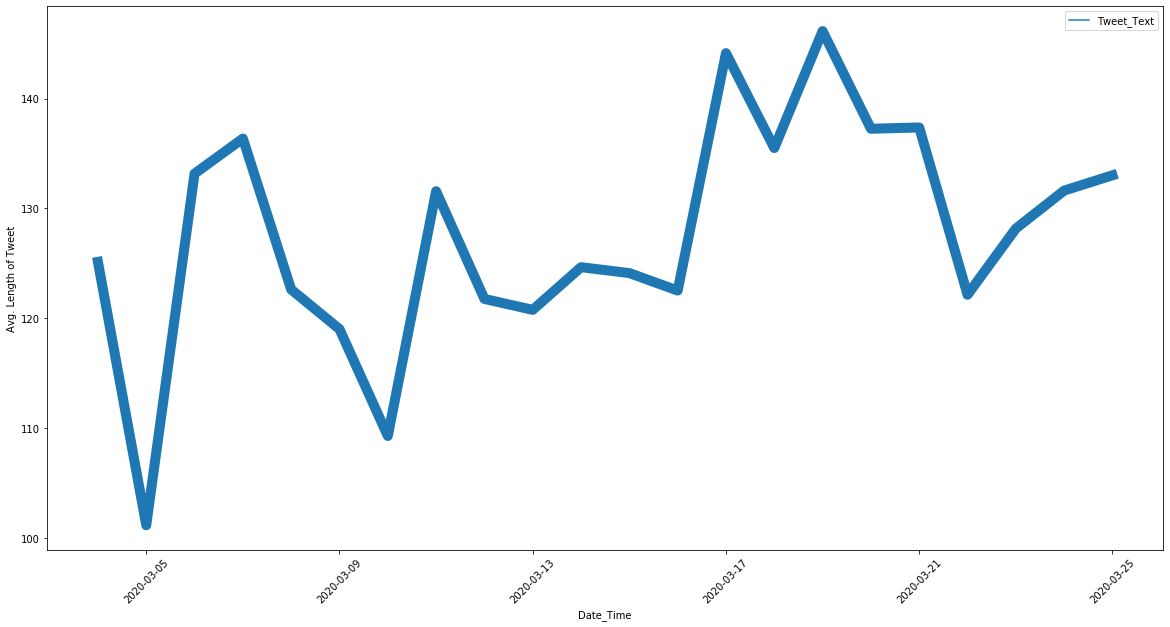

In [64]:
#trying out pandas' resample method for a dataframe
c = b[['Date_Time', 'Tweet_Text']].copy()
c['Tweet_Text'] = c['Tweet_Text'].str.len()
c.set_index('Date_Time', inplace = True)
c = c.resample('D').mean()

plt.figure(figsize = (20, 10))
sns.lineplot(data = c, lw = 10)
plt.xticks(rotation = 45)
plt.ylabel('Avg. Length of Tweet')

**Looking at duplicated tweets:**

In [65]:
i = pd.read_csv('CUT_DATA/TIME.csv', index_col = 'ID')
i.head()

,User,Source_Name,Tweet_Text,Date_Time
ID,,,,
1234992586764341248,@TIME,TIME,"Elisabeth Moss ""is @TheInvisibleMan's skeleton...",2020-03-04 00:02:32
1234994465208619010,@TIME,TIME,Judge extends Tennessee voting in area hit by ...,2020-03-04 00:10:00
1234998707373801472,@TIME,TIME,Resurgent Joe Biden starts Super Tuesday with ...,2020-03-04 00:26:51
1235000253339668480,@TIME,TIME,Health experts are widely skeptical of the num...,2020-03-04 00:33:00
1235007802977984517,@TIME,TIME,"Review: FX on Hulu’s first streaming series, ""...",2020-03-04 01:03:00


In [69]:
#pulling out the tweets that were duplicated
dup = i[i['Tweet_Text'].duplicated()]
dup.head()

,User,Source_Name,Tweet_Text,Date_Time
ID,,,,
1235166347761512448,@TIME,TIME,If extreme measures like mass quarantines come...,2020-03-04 11:33:00
1235173862616248320,@TIME,TIME,"""The Trump administration’s agreement with the...",2020-03-04 12:02:51
1235173862624694273,@TIME,TIME,Infectious disease experts say while the facto...,2020-03-04 12:02:51
1235181379207548930,@TIME,TIME,How the coronavirus' effect on the fashion ind...,2020-03-04 12:32:44
1235188996940148738,@TIME,TIME,Super Tuesday capped a whirlwind few days that...,2020-03-04 13:03:00


In [98]:
#the mean number of times a duplicated tweet is posted
dd = [len(i[i['Tweet_Text'] == dup['Tweet_Text'].iloc[d]]) for d in range(len(dup))]
np.mean(dd)

5.734375

**Trying to use tweet rehydration to solve truncation problem:**

In [24]:
cur = pd.read_csv('CUT_DATA/CNN.csv', index_col = 'ID')
cur.head()

,User,Source_Name,Tweet_Text,Date_Time
ID,,,,
1234992014971691009,@CNN,CNN,The moment is finally here. NASA is accepting ...,2020-03-04 00:00:16
1234992106160046080,@CNN,CNN,BREAKING: Former Vice President Joe Biden will...,2020-03-04 00:00:37
1234993787220328448,@CNN,CNN,Joe Biden will win Virginia’s Democratic prima...,2020-03-04 00:07:18
1234995919252144129,@CNN,CNN,Respirator face masks in California’s emergenc...,2020-03-04 00:15:46
1234996503925575680,@CNN,CNN,Voting has been extended by half an hour in on...,2020-03-04 00:18:06


In [11]:
#subsetting retweets
rts = cur[cur['Tweet_Text'].str.startswith('RT @')]
rts.head()

,User,Source_Name,Tweet_Text,Date_Time
ID,,,,
1235016480556806150,@CNN,CNN,RT @CNNPolitics: CNN's Van Jones reacts to Joe...,2020-03-04 01:37:29
1235029726466420736,@CNN,CNN,RT @CNNPolitics: Polls have closed in 12 of to...,2020-03-04 02:30:07
1235032012085288960,@CNN,CNN,RT @CNNPolitics: CNN's Van Jones breaks down t...,2020-03-04 02:39:12
1235035682508361728,@CNN,CNN,RT @CNNPolitics: CNN's Jake Tapper explains wh...,2020-03-04 02:53:47
1235063440634339329,@CNN,CNN,RT @CNNnewsroom: CNN’s @vanjones68 on Joe Bide...,2020-03-04 04:44:05


In [23]:
#subsetting the tweets that are truncated
rehy = cur[cur['Tweet_Text'].str.endswith('…')]
(~rehy['Tweet_Text'].str.startswith('RT @')).sum()

0

In [34]:
rts.loc[[a for a in rts.index if a not in rehy.index]]

,User,Source_Name,Tweet_Text,Date_Time
ID,,,,
1235029726466420736,@CNN,CNN,RT @CNNPolitics: Polls have closed in 12 of to...,2020-03-04 02:30:07
1235921378446057474,@CNN,CNN,RT @NewDay: Meet the young conservatives who b...,2020-03-06 13:33:13
1236689538094858240,@CNN,CNN,RT @CNNPhotos: These are the pioneering women ...,2020-03-08 16:25:37
1237573710808150016,@CNN,CNN,RT @CNNnewsroom: Bernie Sanders won’t make a p...,2020-03-11 02:59:00
1238205671327371264,@CNN,CNN,RT @CNNBusiness: Here's how long previous bear...,2020-03-12 20:50:11
1238968261200556032,@CNN,CNN,RT @CNNPolitics: NEW: Georgia becomes the seco...,2020-03-14 23:20:27
1238972415688028168,@CNN,CNN,RT @CNNPolitics: JUST IN: President Trump has ...,2020-03-14 23:36:57
1239688976593817600,@CNN,CNN,RT @HLNTV: ALL-NEW #TrueCrime TONIGHT at 9 ET/...,2020-03-16 23:04:18
1240222727178461184,@CNN,CNN,"RT @NewDay: Amid the coronavirus despair, ther...",2020-03-18 10:25:15


In [47]:
#grabbing the tweets that need to be rehydrated and writing them to a text file
sources = ['nytimes', 'CNN', 'bbcworld', 'theeconomist', 'reuters', 'WSJ', 'TIME', 'ABC', 'washingtonpost', 'AP']

tot = 0

for s in sources:
    cur = pd.read_csv('CUT_DATA/' + s + '.csv', index_col = 'ID')
    to_re = cur[cur['Tweet_Text'].fillna('').str.endswith('…')]

    print(s, len(to_re.index))
    print()
    tot += len(to_re.index)

    with open('TO_HYDRATE/' + s + '.txt', 'w') as file:
        for i in to_re.index:
            file.write(str(i) + '\n')

print('TOTAL', tot)

nytimes 545

CNN 160

bbcworld 208

theeconomist 44

reuters 233

WSJ 22

TIME 101

ABC 172

washingtonpost 168

AP 701

TOTAL 2354


In [88]:
#checking that things worked out correctly
things = ['TIME', 'theeconomist', 'washingtonpost', 'WSJ', 'CNN']

for t in things:
    wsj_re = pd.read_csv('REHYDRATED/' + t + '.csv')
    print(len(wsj_re[wsj_re['text'].str.endswith('…')]) == len(wsj_re))
    
wsj_re['id'].shape

True
True
True
True
True


(160,)

In [97]:
#trying to collect non-truncated tweets manually using Twython to query the Twitter API
wsj_re = pd.read_csv('REHYDRATED/washingtonpost.csv')

creds = {}
with open('tInfo.txt', 'r') as f:
    c = f.read().split('\n')
    creds['Consumer_Key'] = c[0]
    creds['Consumer_Secret'] = c[1]
    creds['Access_Key'] = c[2]
    creds['Access_Secret'] = c[3]

py_tweets = Twython(creds['Consumer_Key'], creds['Consumer_Secret'])

full = {}

for i in wsj_re['id']:
    query = {'id' : i,
             'tweet_mode' : 'extended'}
    full[i] = py_tweets.show_status(**query)['full_text']
    
full

{1240397780583165952: 'RT @FenitN: Top D.C. officials held no briefings with the press today on coronavirus, but I found out what they told community leaders on a…',
 1240384996738838530: 'RT @renaemerle: There is now a 60-day foreclosure moratorium for people with FHA mortgage or one backed by Fannie Mae/Freddie Mac.\n\nThere a…',
 1237026269667233799: "RT @elisaslow: Almost half of American workers are now stuck in low-wage jobs, earning a median salary of $17,950. Most of them don't get…",
 1239563987769069571: 'RT @Harry_Stevens: The story features RANDOM simulations, so every time you read it, your results will change. Even with different results,…',
 1236706176521441280: 'RT @FenitN: BREAKING: The first confirmed coronavirus case in the District involved the rector of Christ Church Georgetown. He was present…',
 1240318157585350658: 'RT @jdawsey1: “We will see the number of people diagnosed dramatically increase over the next four or five days,” Dr Birx says, due to far…',
 12359

In [104]:
#they are all truncated still, even when using API directly...
(~pd.Series(full).str.endswith('…')).sum()

0

**Tweaking the collection method:** With the revised colection method, no collected tweets are truncated.

In [51]:
def get_tweets_v2(keys_file, user_handles):
    creds = {}
    with open(keys_file, 'r') as f:
        c = f.read().split('\n')
        creds['Consumer_Key'] = c[0]
        creds['Consumer_Secret'] = c[1]
        creds['Access_Key'] = c[2]
        creds['Access_Secret'] = c[3]

    py_tweets = Twython(creds['Consumer_Key'], creds['Consumer_Secret'])
    num_requests = 0

    for user_handle in user_handles:
        try:
            temp_file = open(user_handle + '.csv', 'r')
            temp_file.close()
        except IOError:
            user_df = pd.DataFrame(columns = ['User', 'Source_Name', 'Date', 'Time', 'Tweet_Text', 'ID', 'Article_Link'])
            user_df.set_index('ID', inplace = True)
        else:
            user_df = pd.read_csv(user_handle + '.csv', index_col = 'ID')
            user_df.index = user_df.index.astype('str')

        at_limit = False
        older_than = None

        while not at_limit:
            queryA = {'q' : 'from:' + user_handle,
                    'result_type' : 'recent',
                    'count' : 100,
                    'lang' : 'en',
                    'tweet_mode' : 'extended',
                    'max_id' : older_than
                    }

            user_dict = {'User' : [], 'Source_Name' : [], 'Date' : [], 'Time' : [], 'Tweet_Text' : [], 'ID' : [], 'Article_Link' : []}

            for status in py_tweets.search(**queryA)['statuses']:
                if status['id_str'] not in user_df.index:
                    user_dict['User'].append('@' + status['user']['screen_name'])

                    user_dict['Source_Name'].append(status['user']['name'])

                    date_time = status['created_at'].split()
                    user_dict['Date'].append(' '.join(date_time[0 : 3]) + ' ' + date_time[5])
                    user_dict['Time'].append(date_time[3])
                          
                    s = status['full_text']
                    if s.startswith('RT @'):
                        s = s.split(':')[0] + ': ' + status['retweeted_status']['full_text']
                    link_index = s.find('http')
                        
                    if link_index != -1:
                        user_dict['Tweet_Text'].append(s[0 : link_index].replace('\n', ' '))
                    else:
                        user_dict['Tweet_Text'].append(s.replace('\n', ' '))

                    user_dict['ID'].append(status['id_str'])

                    if status['entities']['urls'] != []:
                        user_dict['Article_Link'].append(status['entities']['urls'][-1]['expanded_url'])
                    else:
                        user_dict['Article_Link'].append(None)

            temp_df = pd.DataFrame(user_dict)
            temp_df.set_index('ID', inplace = True)
            user_df = user_df.append(temp_df)
            user_df.sort_index(inplace = True)

            if list(temp_df.index) != []:
                older_than = temp_df.index[-1]
            else:
                at_limit = True

            num_requests += 1

        user_df.to_csv(user_handle + '.csv')

    print(num_requests)

In [53]:
#trying it out
get_tweets_v2('tInfo.txt', ['ABC'])

13


In [58]:
df = pd.read_csv('MISC_TESTS/ABC.csv', index_col = 'ID')
df.head()

,User,Source_Name,Date,Time,Tweet_Text,Article_Link
ID,,,,,,
1262935085856313346,@ABC,ABC News,Wed May 20 2020,02:36:03,DOLPHINS DON'T DISTANCE: Passengers on a whale...,https://abcn.ws/2WK0ezS
1262939024588599296,@ABC,ABC News,Wed May 20 2020,02:51:42,LATEST: Michigan Gov. Gretchen Whitmer has dec...,https://abcn.ws/36cIznG
1262940872712347649,@ABC,ABC News,Wed May 20 2020,02:59:03,Are these hornets actually a big risk—or is it...,https://abcn.ws/3g3QeJC
1262945185014730753,@ABC,ABC News,Wed May 20 2020,03:16:11,Two GOP senators have come under fire for susp...,https://abcn.ws/2zguF7M
1262949434872266755,@ABC,ABC News,Wed May 20 2020,03:33:04,Pres. Trump is pushing for businesses to reope...,https://abcn.ws/2XgHRS8


In [59]:
#checking that collected tweets to mkae sure none are truncated
sub = df[df['Tweet_Text'].str.startswith('RT @')]
sub.head()

,User,Source_Name,Date,Time,Tweet_Text,Article_Link
ID,,,,,,
1263078548035731456,@ABC,ABC News,Wed May 20 2020,12:06:07,RT @RobinRoberts: This morn we're kicking off ...,NaN
1263082586324307973,@ABC,ABC News,Wed May 20 2020,12:22:10,RT @GMA: Some essential workers who need to co...,NaN
1263083164538454016,@ABC,ABC News,Wed May 20 2020,12:24:28,"RT @TheBradMielke: ""There is not one wealthy c...",NaN
1263093892850860033,@ABC,ABC News,Wed May 20 2020,13:07:05,RT @GMA: Navajo nation surpasses New York in h...,https://gma.abc/2zePj8u
1263103400582971392,@ABC,ABC News,Wed May 20 2020,13:44:52,"RT @RobinRoberts: This morning across @ABC, we...",https://abcn.ws/2XkBGNc


In [61]:
len(sub['Tweet_Text'].str.len() > 140)

72

In [63]:
sub['Tweet_Text'].str.endswith('…').sum()

0

In [64]:
df['Tweet_Text'].str.endswith('…').sum()

0

**Looking at the distribution of character lengths in the data:**

In [21]:
#initial test with one source
cur = pd.read_csv('CUT_DATA/ABC.csv')
cur.head()

,ID,User,Source_Name,Tweet_Text,Date_Time
0,1234991970243604482,@ABC,ABC News,BREAKING: Joe Biden will win the Virginia prim...,2020-03-04 00:00:05
1,1234992246996357120,@ABC,ABC News,BREAKING: Bernie Sanders will win the Vermont ...,2020-03-04 00:01:11
2,1234992631907672064,@ABC,ABC News,47% of VA Democratic voters say they made thei...,2020-03-04 00:02:43
3,1234992761851371520,@ABC,ABC News,"In Virginia, Joe Biden benefited from his pers...",2020-03-04 00:03:14
4,1234992904730337280,@ABC,ABC News,Asked who they think is best able to beat Trum...,2020-03-04 00:03:48


In [22]:
not_trunc = cur[~cur['Tweet_Text'].str.endswith('…')]
print(len(not_trunc))
not_trunc.head()

4477


,ID,User,Source_Name,Tweet_Text,Date_Time
0,1234991970243604482,@ABC,ABC News,BREAKING: Joe Biden will win the Virginia prim...,2020-03-04 00:00:05
1,1234992246996357120,@ABC,ABC News,BREAKING: Bernie Sanders will win the Vermont ...,2020-03-04 00:01:11
2,1234992631907672064,@ABC,ABC News,47% of VA Democratic voters say they made thei...,2020-03-04 00:02:43
3,1234992761851371520,@ABC,ABC News,"In Virginia, Joe Biden benefited from his pers...",2020-03-04 00:03:14
4,1234992904730337280,@ABC,ABC News,Asked who they think is best able to beat Trum...,2020-03-04 00:03:48


Text(0.5, 1.0, 'Character Length Distribution for ABC News')

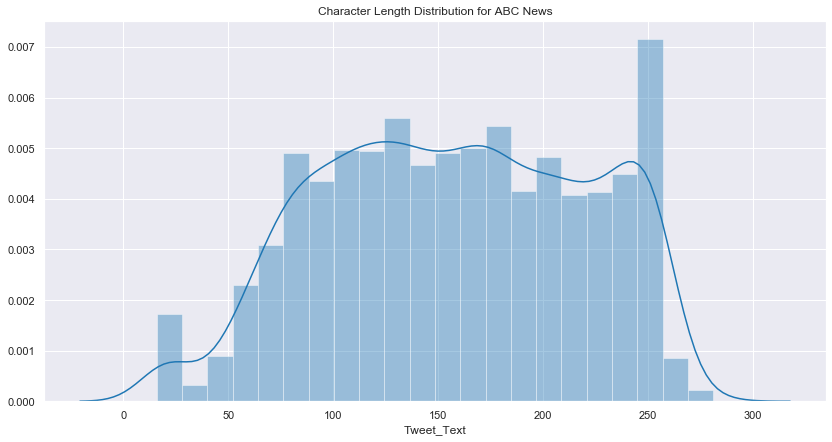

In [23]:
plt.figure(figsize = (14, 7))
sns.distplot(not_trunc['Tweet_Text'].str.len())
plt.title('Character Length Distribution for ' + not_trunc['Source_Name'].iloc[0])

In [17]:
sources = ['CNN', 'bbcworld', 'theeconomist', 'reuters', 'WSJ', 'TIME', 'ABC', 'washingtonpost', 'AP']

df = pd.read_csv('CUT_DATA/nytimes.csv', index_col = 'ID')

for s in sources:
    df = df.append(pd.read_csv('CUT_DATA/' + s + '.csv', index_col = 'ID'))
    
#df contains ALL tweets... truncated and non-truncated
df['Source_Name'].value_counts()

Reuters                    12030
ABC News                    4649
CNN                         4615
The Washington Post         4130
The New York Times          3207
The Economist               3179
The Wall Street Journal     2633
TIME                        2398
The Associated Press        1764
BBC News (World)            1186
Name: Source_Name, dtype: int64

In [18]:
#sub exlcudes truncated tweets
sub = df[~df['Tweet_Text'].str.endswith('…').fillna(True)].copy()
sub['Tweet_Text'] = sub['Tweet_Text'].apply(lambda x: ':'.join(x.split(':')[1 : ]) if x.startswith('RT @') else x)
sub['Source_Name'].value_counts()

Reuters                    11795
ABC News                    4477
CNN                         4455
The Washington Post         3962
The Economist               3134
The New York Times          2662
The Wall Street Journal     2609
TIME                        2297
The Associated Press        1063
BBC News (World)             978
Name: Source_Name, dtype: int64

In [19]:
print(sub['Tweet_Text'].str.startswith('RT').sum(), sub['Tweet_Text'].str.endswith('…').sum())
len(sub)

0 0


37432

In [20]:
#fin takes only 'Source_Name' and 'Tweet_Text' columns of sub
fin = sub[['Source_Name', 'Tweet_Text']].copy()
fin['Tweet_Length'] = fin['Tweet_Text'].str.len()
fin.head()

,Source_Name,Tweet_Text,Tweet_Length
ID,,,
1234991999750565888,The New York Times,"Polls have now closed in Vermont, Virginia and...",158
1234993730874011649,The New York Times,Breaking News: Joe Biden won Virginia and Bern...,162
1234996189403041795,The New York Times,Our reporters are providing real-time updates ...,119
1234997580829872128,The New York Times,As we wait for more polls to close in Super Tu...,144
1234999525594423296,The New York Times,Polls have now closed in North Carolina. Follo...,134


In [21]:
print(fin['Tweet_Text'].str.startswith('RT').sum(), fin['Tweet_Text'].str.endswith('…').sum())

0 0


In [22]:
#bg excludes the tweets under 140 characters in length
bg = fin[fin['Tweet_Length'] > 140]
print(len(bg))
bg.head()

14506


,Source_Name,Tweet_Text,Tweet_Length
ID,,,
1234991999750565888,The New York Times,"Polls have now closed in Vermont, Virginia and...",158
1234993730874011649,The New York Times,Breaking News: Joe Biden won Virginia and Bern...,162
1234997580829872128,The New York Times,As we wait for more polls to close in Super Tu...,144
1235001966855626753,The New York Times,Breaking News: Joe Biden clinched North Caroli...,146
1235004015659937792,The New York Times,Voting was extended in one North Carolina prec...,200


In [23]:
(~(bg['Tweet_Length'] > 140)).sum()

0

In [24]:
#looking at the average tweet length for tweets over 140 characters
#REMEMBER: truncated tweets aren't in this data set... they're all under 140 characters
groups = bg.groupby('Source_Name')

mea = groups.mean()
med = groups.median()

trunc_loss = pd.concat([mea, med], axis = 1)
trunc_loss.columns = ['Mean_Tweet_Length', 'Median_Tweet_Length']
trunc_loss['Mean_Tweet_Length'] = trunc_loss['Mean_Tweet_Length'].apply(lambda x: round(x, 3))
trunc_loss

,Mean_Tweet_Length,Median_Tweet_Length
Source_Name,,
ABC News,201.378,201
BBC News (World),196.179,195
CNN,207.269,207
Reuters,186.320,182
TIME,192.152,187
The Associated Press,207.783,211
The Economist,177.582,166
The New York Times,201.740,201
The Wall Street Journal,176.027,167


In [25]:
#cleaning up the table
ind = ['ABC', 'bbcworld', 'CNN', 'reuters', 'TIME', 'AP', 'theeconomist', 'nytimes', 'WSJ', 'washingtonpost']
trunc_loss.index = ind
trunc_loss.loc['Overall'] = [bg['Tweet_Length'].mean(), bg['Tweet_Length'].median()]
trunc_loss

,Mean_Tweet_Length,Median_Tweet_Length
ABC,201.378000,201.0
bbcworld,196.179000,195.0
CNN,207.269000,207.0
reuters,186.320000,182.0
TIME,192.152000,187.0
AP,207.783000,211.0
theeconomist,177.582000,166.0
nytimes,201.740000,201.0
WSJ,176.027000,167.0
washingtonpost,194.300000,191.0


In [26]:
#bringing in the descriptive data set
other = pd.read_csv('CUT_DATA/descriptive_dataset.csv', index_col = 0)
other

,Num_Tweets,Unique_Tweets,Percent_Unique,Num_Retweets,Percent_Retweets,Num_Truncated,Percent_Truncated
nytimes,3207,3088,0.963,634,0.198,545,0.170
CNN,4615,3672,0.796,182,0.039,160,0.035
bbcworld,1186,1180,0.995,376,0.317,208,0.175
theeconomist,3179,2164,0.681,69,0.022,44,0.014
reuters,12030,9574,0.796,411,0.034,233,0.019
WSJ,2633,2448,0.930,24,0.009,22,0.008
TIME,2398,1502,0.626,112,0.047,101,0.042
ABC,4649,3764,0.810,237,0.051,172,0.037
washingtonpost,4130,3959,0.959,226,0.055,168,0.041
AP,1764,1704,0.966,832,0.472,701,0.397


In [27]:
#putting everything together
a = trunc_loss.iloc[ : -1].sort_index()
b = other.iloc[ : -1].sort_index()
a['Char_Loss_By_Mean'] = (a['Mean_Tweet_Length'] * b['Num_Truncated']) - (b['Num_Truncated'] * 140)
a['Char_Loss_By_Median'] = (a['Median_Tweet_Length'] * b['Num_Truncated']) - (b['Num_Truncated'] * 140)

a.loc['Overall'] = [round(x, 3) for x in list(trunc_loss.loc['Overall'])] + [a['Char_Loss_By_Mean'].sum(), a['Char_Loss_By_Median'].sum()]
a

,Mean_Tweet_Length,Median_Tweet_Length,Char_Loss_By_Mean,Char_Loss_By_Median
ABC,201.378,201.0,10557.016,10492.0
AP,207.783,211.0,47515.883,49771.0
CNN,207.269,207.0,10763.040,10720.0
TIME,192.152,187.0,5267.352,4747.0
WSJ,176.027,167.0,792.594,594.0
bbcworld,196.179,195.0,11685.232,11440.0
nytimes,201.740,201.0,33648.300,33245.0
reuters,186.320,182.0,10792.560,9786.0
theeconomist,177.582,166.0,1653.608,1144.0
washingtonpost,194.300,191.0,9122.400,8568.0


In [28]:
fin['Tweet_Length'].sum()

4834807

In [29]:
#getting total observed character lengths for each source and overall
overall = df[['User', 'Tweet_Text']].copy()
overall['User'] = overall['User'].str[1 : ]
overall['Tweet_Text'] = overall['Tweet_Text'].str.rstrip('…')
overall['Tweet_Text'] = overall['Tweet_Text'].fillna('').apply(lambda x: ':'.join(x.split(':')[1 : ]) if x.startswith('RT @') else x)
overall['Tweet_Length'] = overall['Tweet_Text'].str.len()
new_col = overall.groupby('User').sum()
new_col.loc['Overall'] = new_col['Tweet_Length'].sum()
new_col.rename({'BBCWorld' : 'bbcworld', 'Reuters' : 'reuters', 'TheEconomist' : 'theeconomist'}, axis = 'index', inplace = True)

new_col

,Tweet_Length
User,
ABC,724828
AP,275391
bbcworld,114951
CNN,848574
reuters,1193362
TIME,303245
theeconomist,354869
WSJ,381382
nytimes,539554


In [30]:
#percent loss: the expected loss divided by sum of expected and observed characters
a['Perc_Loss_By_Mean'] = a['Char_Loss_By_Mean'] / (new_col['Tweet_Length'] + a['Char_Loss_By_Mean'])
a['Perc_Loss_By_Median'] = a['Char_Loss_By_Median'] / (new_col['Tweet_Length'] + a['Char_Loss_By_Median'])
a['Perc_Loss_By_Mean'] = a['Perc_Loss_By_Mean'].apply(lambda x: round(x, 3))
a['Perc_Loss_By_Median'] = a['Perc_Loss_By_Median'].apply(lambda x: round(x, 3))
a

,Mean_Tweet_Length,Median_Tweet_Length,Char_Loss_By_Mean,Char_Loss_By_Median,Perc_Loss_By_Mean,Perc_Loss_By_Median
ABC,201.378,201.0,10557.016,10492.0,0.014,0.014
AP,207.783,211.0,47515.883,49771.0,0.147,0.153
CNN,207.269,207.0,10763.040,10720.0,0.013,0.012
TIME,192.152,187.0,5267.352,4747.0,0.017,0.015
WSJ,176.027,167.0,792.594,594.0,0.002,0.002
bbcworld,196.179,195.0,11685.232,11440.0,0.092,0.091
nytimes,201.740,201.0,33648.300,33245.0,0.059,0.058
reuters,186.320,182.0,10792.560,9786.0,0.009,0.008
theeconomist,177.582,166.0,1653.608,1144.0,0.005,0.003
washingtonpost,194.300,191.0,9122.400,8568.0,0.023,0.022


In [38]:
a.to_csv('CUT_DATA/truncation_losses.csv')

In [31]:
ORDER = ['nytimes', 'CNN', 'bbcworld', 'theeconomist', 'reuters', 'WSJ', 'TIME', 'ABC', 'washingtonpost', 'AP']
PAL = sns.husl_palette(10, l = 0.6, s = 0.6, h = 0.7)

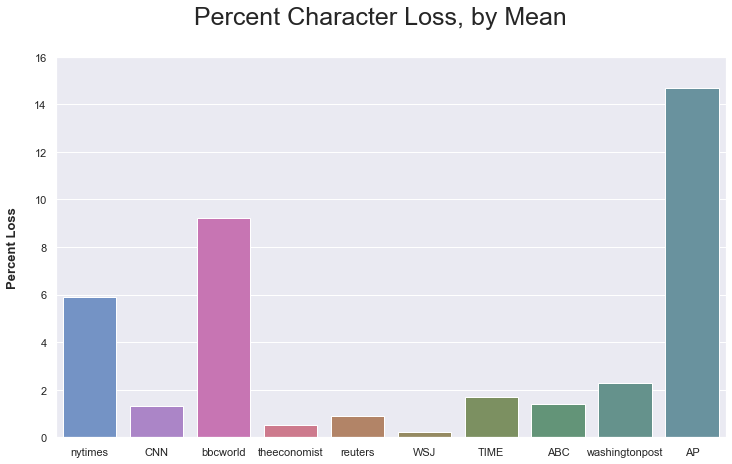

In [32]:
#percent loss figure, by mean

#style:
sns.set_style('darkgrid')

#context:
sns.set_context('notebook')

#figure size:
plt.figure(figsize = (12, 7))

plt.suptitle('Percent Character Loss, by Mean', fontsize = 25)
plot1 = sns.barplot(x = a.index, y = (a['Perc_Loss_By_Mean'] * 100), palette = PAL, order = ORDER)
plt.ylabel('Percent Loss', fontsize = 13, labelpad = 15, **{'fontweight' : 'semibold'})
plt.ylim(0, 16)
plot1

In [19]:
plot1.get_figure().savefig('FIGURES/percent_loss_by_mean.png', dpi = 400)

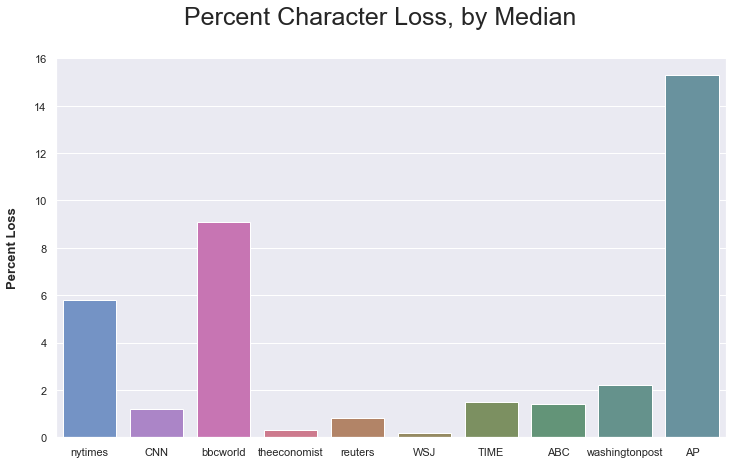

In [20]:
#percent loss figure, by median

#style:
sns.set_style('darkgrid')

#context:
sns.set_context('notebook')

#figure size:
plt.figure(figsize = (12, 7))

plt.suptitle('Percent Character Loss, by Median', fontsize = 25)
plot2 = sns.barplot(x = a.index, y = (a['Perc_Loss_By_Median'] * 100), palette = PAL, order = ORDER)
plt.ylabel('Percent Loss', fontsize = 13, labelpad = 15, **{'fontweight' : 'semibold'})
plot2

In [21]:
plot2.get_figure().savefig('FIGURES/percent_loss_by_median.png', dpi = 400)

In [43]:
test = a[['Perc_Loss_By_Mean', 'Perc_Loss_By_Median']].copy()
test['Source'] = test.index
test['Perc_Loss_By_Median'] = test['Perc_Loss_By_Median'].iloc[ : : -1].values

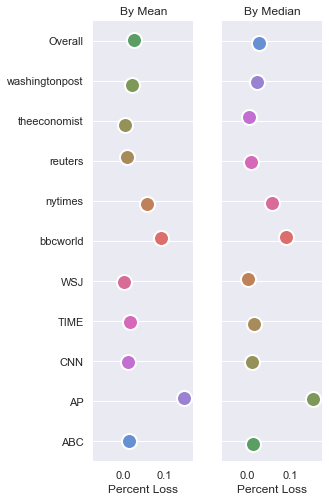

In [44]:
#trying out a different visualization, based on seaborn's figure gallery
sns.set(style = "darkgrid")

# Make the PairGrid
g = sns.PairGrid(test, x_vars = test.columns[ : -1], y_vars = ['Source'], height = 7, aspect = .3)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size = 15, orient = "h", palette = sns.husl_palette(15, l = 0.6, s = 0.6, h = 0.7), linewidth = 2, edgecolor = "w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel = "Percent Loss", ylabel = "")

# Use semantically meaningful titles for the columns
titles = ['By Mean', 'By Median']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [22]:
pd.read_csv('CUT_DATA/truncation_losses.csv', index_col = 0)

,Mean_Tweet_Length,Median_Tweet_Length,Char_Loss_By_Mean,Char_Loss_By_Median,Perc_Loss_By_Mean,Perc_Loss_By_Median
ABC,201.378,201.0,10557.016,10492.0,0.014,0.014
AP,207.783,211.0,47515.883,49771.0,0.147,0.153
CNN,207.269,207.0,10763.040,10720.0,0.013,0.012
TIME,192.152,187.0,5267.352,4747.0,0.017,0.015
WSJ,176.027,167.0,792.594,594.0,0.002,0.002
bbcworld,196.179,195.0,11685.232,11440.0,0.092,0.091
nytimes,201.740,201.0,33648.300,33245.0,0.059,0.058
reuters,186.320,182.0,10792.560,9786.0,0.009,0.008
theeconomist,177.582,166.0,1653.608,1144.0,0.005,0.003
washingtonpost,194.300,191.0,9122.400,8568.0,0.023,0.022


In [11]:
#doing the same as fin
for_dist = sub[['User', 'Tweet_Text']].copy()
for_dist['Tweet_Length'] = for_dist['Tweet_Text'].str.len()
for_dist['User'] = for_dist['User'].str[1 : ]
print(len(for_dist))
for_dist.head()

37432


,User,Tweet_Text,Tweet_Length
ID,,,
1234991999750565888,nytimes,"Polls have now closed in Vermont, Virginia and...",158
1234993730874011649,nytimes,Breaking News: Joe Biden won Virginia and Bern...,162
1234996189403041795,nytimes,Our reporters are providing real-time updates ...,119
1234997580829872128,nytimes,As we wait for more polls to close in Super Tu...,144
1234999525594423296,nytimes,Polls have now closed in North Carolina. Follo...,134


In [12]:
#doing the same as bg
for_dist2 = for_dist[for_dist['Tweet_Length'] > 140]
for_dist2.head()

,User,Tweet_Text,Tweet_Length
ID,,,
1234991999750565888,nytimes,"Polls have now closed in Vermont, Virginia and...",158
1234993730874011649,nytimes,Breaking News: Joe Biden won Virginia and Bern...,162
1234997580829872128,nytimes,As we wait for more polls to close in Super Tu...,144
1235001966855626753,nytimes,Breaking News: Joe Biden clinched North Caroli...,146
1235004015659937792,nytimes,Voting was extended in one North Carolina prec...,200


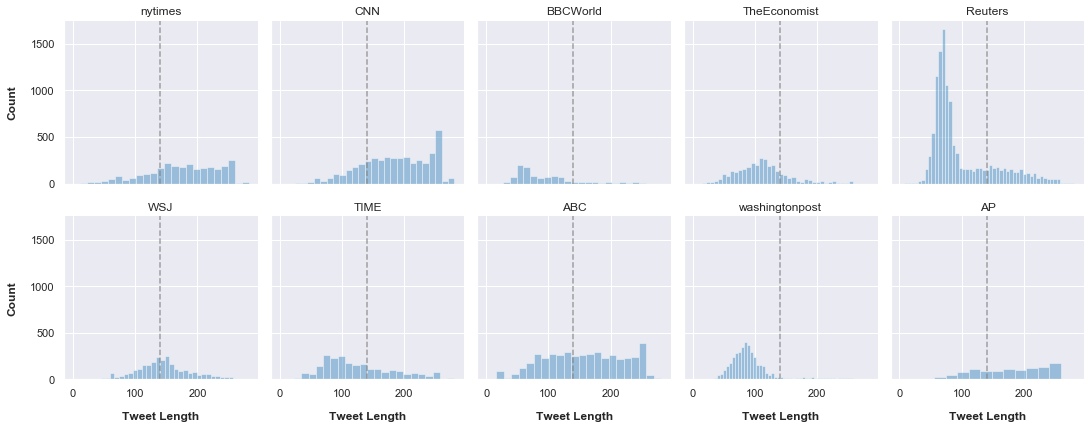

In [43]:
#distributions for OVERALL - not including truncated tweets, we don't have good distribution data for them
g1 = sns.FacetGrid(for_dist, col = 'User', col_wrap = 5, \
                   palette = PAL)
g1.map(sns.distplot, 'Tweet_Length', kde = False).set_titles('{col_name}').set(yticks = [0, 500, 1000, 1500])

g1.set_ylabels('Count', fontsize = 12, labelpad = 13, **{'fontweight' : 'semibold'})
g1.set_xlabels('Tweet Length', fontsize = 12, labelpad = 13, **{'fontweight' : 'semibold'})

#adding a vertical line for orientation at 140 characters
for a in g1.axes:
    a.axvline(140, ls = '--', color = 'grey', alpha = 0.7)

In [44]:
g1.savefig('FIGURES/distribution_of_tweet_char_lengths_OVERALL_no_KDE_ALT.png', dpi = 400)

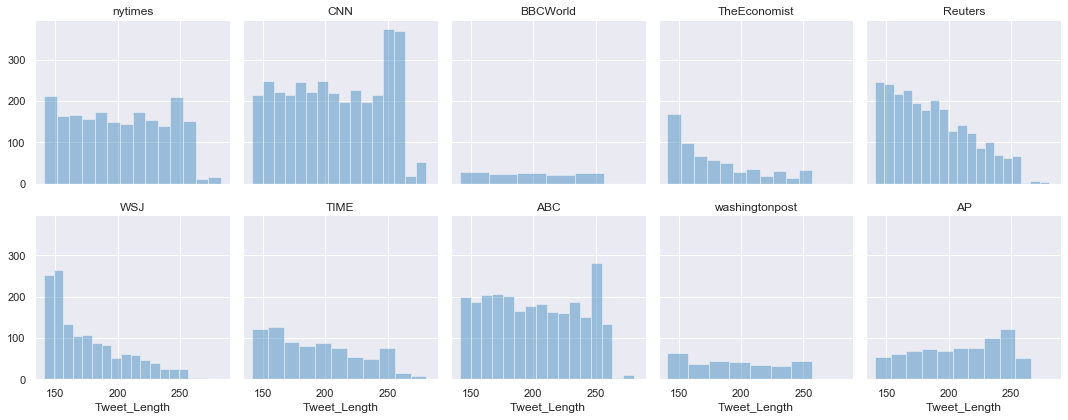

In [28]:
#distributions for OVER 140 CHARACTERS
g2 = sns.FacetGrid(for_dist2, col = 'User', col_wrap = 5, \
                   palette = PAL)
g2.map(sns.distplot, 'Tweet_Length', kde = False).set_titles('{col_name}')

In [31]:
g2.savefig('FIGURES/distribution_of_tweet_char_lengths_OVER_140_no_KDE_ALT.png', dpi = 400)